In [7]:
import pandas as pd

# Load your stock price CSV
df = pd.read_csv("../data/goog.csv")

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

# Display first rows
df.head()


,Date,Close,High,Low,Open,Volume
0,2009-01-02,7.948608,7.960977,7.557264,7.633949,144961322
1,2009-01-05,8.115089,8.194003,7.792268,7.940692,196293007
2,2009-01-06,8.263762,8.430492,8.074027,8.237046,257971329
3,2009-01-07,7.965677,8.185839,7.885034,8.121770,180453860
4,2009-01-08,8.044340,8.044340,7.850152,7.873406,144567852


In [17]:
df.rename(columns={
    'open':'Open',
    'high':'High',
    'low':'Low',
    'close':'Close',
    'volume':'Volume'
}, inplace=True)


In [8]:
import talib
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'])
df.head()



,Date,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI,MACD,MACD_signal,MACD_hist
0,2009-01-02,7.948608,7.960977,7.557264,7.633949,144961322,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,8.115089,8.194003,7.792268,7.940692,196293007,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,8.263762,8.430492,8.074027,8.237046,257971329,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,7.965677,8.185839,7.885034,8.121770,180453860,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,8.044340,8.044340,7.850152,7.873406,144567852,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import numpy as np
df['returns'] = df['Close'].pct_change()
volatility = np.sqrt(252) * df['returns'].std()
print(volatility)


0.2751614903189815


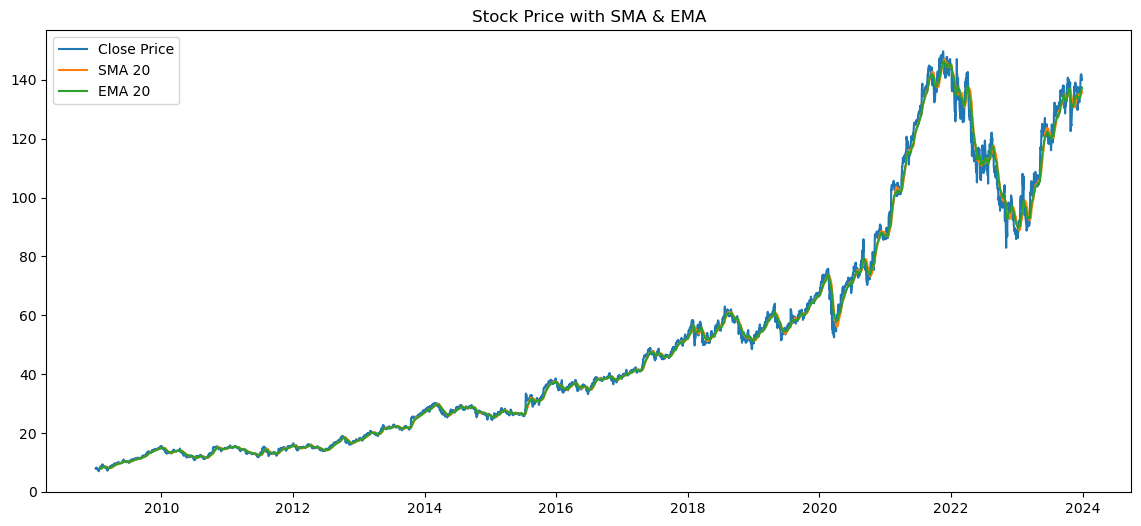

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['EMA_20'], label='EMA 20')
plt.title("Stock Price with SMA & EMA")
plt.legend()
plt.show()

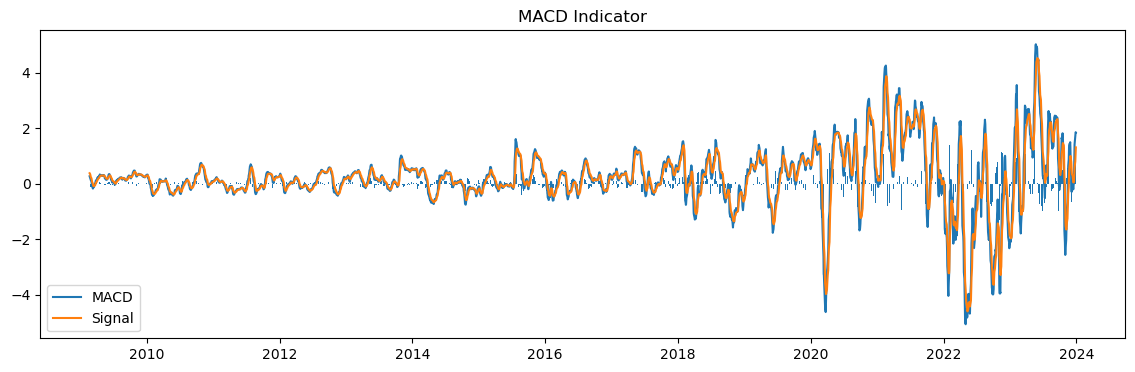

In [11]:
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.plot(df['Date'], df['MACD_signal'], label='Signal')
plt.bar(df['Date'], df['MACD_hist'])
plt.title("MACD Indicator")
plt.legend()
plt.show()
